## Final Project Submission

* Student name: Maurine Chemutai
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Aviation Risk Analysis
## Identifying Low-Risk Aircraft for Business Expansion
## Project Overview

For this Phase 1 project, data cleaning, imputation, analysis, and visualization are used to generate insights for a business stakeholder.

The company is expanding into new industries to diversify its portfolio and is considering purchasing and operating aircraft for both commercial and private enterprises. However, the company does not have prior experience with aviation-related risks. This project analyzes historical aviation accident data to support data-driven decision-making regarding aircraft acquisition and operation.

## 1. Data Understanding


This project uses aviation accident data from the National Transportation Safety Board (NTSB), covering civil aviation accidents and selected incidents from **1962 to 2023**. The dataset includes records of accidents involving U.S.-registered aircraft in the United States and international waters.




### Importing neccessary Libraries

In [11]:
#importing pandas library for data manipulation
import pandas as pd
#importing numpy library for numerical computation
import numpy as np
#importing matplotlib library for data visualization
import matplotlib.pyplot as plt


### Loading the Dataset

In [12]:
df=pd.read_csv("Aviation_Data.csv")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_2260\1660613976.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Aviation_Data.csv")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [13]:
# The structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [14]:
#Summary statistics of the dataset
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [15]:
# Check for duplicate rows in the dataframe and display them
df[df.duplicated()]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
64050,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64052,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64388,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64552,NaN,25-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90004,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90010,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90031,NaN,15-12-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Remove duplicate rows from the dataframe (keeps the first occurrence)
df.drop_duplicates()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## 2. Data Preparation



To focus the analysis on factors most relevant to assessing aircraft risk, a subset of variables was selected from the original dataset. These columns capture key dimensions related to **aircraft characteristics**, **operational conditions**, and **accident severity**.

Aircraft-related variables such as *Aircraft Category, Make, Model, Engine Type,* and *Number of Engines* were included to evaluate how design and manufacturer attributes influence accident outcomes. Operational variables like *Purpose of Flight, FAR Description,* and *Schedule* help distinguish between commercial, private, and regulatory contexts. Environmental and situational factors, including *Weather Condition* and *Broad Phase of Flight*, provide insight into external risks during different stages of operation.

Finally, outcome variables such as *Aircraft Category, Injury Severity,* and the counts of *Fatal, Serious, Minor,* and *Uninjured* individuals were retained to quantify accident impact and severity. Together, these selected columns enable a focused, risk-oriented analysis aligned with the project’s business objective of identifying lower-risk aircraft options.


### Select relevant columns

In [17]:
# Defining a list of columns to keep from the original dataframe
cols = [
    'Aircraft.Category', 'Make', 'Model', 'Engine.Type',
    'Number.of.Engines', 'Purpose.of.flight',
    'Weather.Condition', 'Broad.phase.of.flight',
    'Aircraft.damage', 'Injury.Severity',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries',
    'Total.Minor.Injuries','Amateur.Built', 'FAR.Description',
    'Schedule'
]

# Create a new dataframe (df1) with only the selected columns
df1= df[cols]
# Display the new dataframe
df1

,Aircraft.Category,Make,Model,Engine.Type,Number.of.Engines,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Amateur.Built,FAR.Description,Schedule,Country
0,NaN,Stinson,108-3,Reciprocating,1.0,Personal,UNK,Cruise,Destroyed,Fatal(2),2.0,0.0,0.0,No,NaN,NaN,United States
1,NaN,Piper,PA24-180,Reciprocating,1.0,Personal,UNK,Unknown,Destroyed,Fatal(4),4.0,0.0,0.0,No,NaN,NaN,United States
2,NaN,Cessna,172M,Reciprocating,1.0,Personal,IMC,Cruise,Destroyed,Fatal(3),3.0,NaN,NaN,No,NaN,NaN,United States
3,NaN,Rockwell,112,Reciprocating,1.0,Personal,IMC,Cruise,Destroyed,Fatal(2),2.0,0.0,0.0,No,NaN,NaN,United States
4,NaN,Cessna,501,NaN,NaN,Personal,VMC,Approach,Destroyed,Fatal(1),1.0,2.0,NaN,No,NaN,NaN,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,NaN,PIPER,PA-28-151,NaN,NaN,Personal,NaN,NaN,NaN,Minor,0.0,1.0,0.0,No,091,NaN,United States
90344,NaN,BELLANCA,7ECA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,NaN,NaN,United States
90345,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,1.0,Personal,VMC,NaN,Substantial,Non-Fatal,0.0,0.0,0.0,No,091,NaN,United States
90346,NaN,CESSNA,210N,NaN,NaN,Personal,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,091,NaN,United States


In [18]:
# Checking missing values
df1.isna().sum()

Aircraft.Category         58061
Make                       1522
Model                      1551
Engine.Type                8555
Number.of.Engines          7543
Purpose.of.flight          7651
Weather.Condition          5951
Broad.phase.of.flight     28624
Aircraft.damage            4653
Injury.Severity            2459
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Amateur.Built              1561
FAR.Description           58325
Schedule                  77766
Country                    1685
dtype: int64

### Handling missing values


Missing values were handled based on the role of each variable. Injury count columns were filled with zero since most accidents reported no injuries and these values are required for severity calculations. Rows missing `Aircraft.Category` or `Engine.Type` were removed because these variables are essential for risk comparison. All remaining categorical variables were filled with `"Unknown"` to retain observations while clearly indicating missing information. The `Number.of.Engines` column was imputed using the mode, as most aircraft have a single engine.


In [19]:
# Fill missing values in injury columns with 0
df1['Total.Fatal.Injuries'] = df1['Total.Fatal.Injuries'].fillna(0)
df1['Total.Serious.Injuries'] = df1['Total.Serious.Injuries'].fillna(0)
df1['Total.Minor.Injuries'] = df1['Total.Minor.Injuries'].fillna(0)


C:\Users\hp\AppData\Local\Temp\ipykernel_2260\4003699883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total.Fatal.Injuries'] = df1['Total.Fatal.Injuries'].fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2260\4003699883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total.Serious.Injuries'] = df1['Total.Serious.Injuries'].fillna(0)
C:\Users\hp\AppData\Local\Temp\ipykernel_2260\4003699883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,Aircraft.Category,Make,Model,Engine.Type,Number.of.Engines,Purpose.of.flight,Weather.Condition,Broad.phase.of.flight,Aircraft.damage,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Amateur.Built,FAR.Description,Schedule,Country
0,NaN,Stinson,108-3,Reciprocating,1.0,Personal,UNK,Cruise,Destroyed,Fatal(2),2.0,0.0,0.0,No,NaN,NaN,United States
1,NaN,Piper,PA24-180,Reciprocating,1.0,Personal,UNK,Unknown,Destroyed,Fatal(4),4.0,0.0,0.0,No,NaN,NaN,United States
2,NaN,Cessna,172M,Reciprocating,1.0,Personal,IMC,Cruise,Destroyed,Fatal(3),3.0,0.0,0.0,No,NaN,NaN,United States
3,NaN,Rockwell,112,Reciprocating,1.0,Personal,IMC,Cruise,Destroyed,Fatal(2),2.0,0.0,0.0,No,NaN,NaN,United States
4,NaN,Cessna,501,NaN,NaN,Personal,VMC,Approach,Destroyed,Fatal(1),1.0,2.0,0.0,No,NaN,NaN,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,NaN,PIPER,PA-28-151,NaN,NaN,Personal,NaN,NaN,NaN,Minor,0.0,1.0,0.0,No,091,NaN,United States
90344,NaN,BELLANCA,7ECA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,NaN,NaN,United States
90345,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,NaN,1.0,Personal,VMC,NaN,Substantial,Non-Fatal,0.0,0.0,0.0,No,091,NaN,United States
90346,NaN,CESSNA,210N,NaN,NaN,Personal,NaN,NaN,NaN,NaN,0.0,0.0,0.0,No,091,NaN,United States


In [20]:
# Select all categorical columns
categorical_cols = df1.select_dtypes(include='object').columns


# Fill missing values with 'Unknown' for all categorical columns
df1.loc[:, categorical_cols] = df1.loc[:, categorical_cols].fillna('Unknown')

# Find the most common value (mode) for the 'Number.of.Engines' column
mode_engines = df1['Number.of.Engines'].mode()[0]

# Fill missing values in the 'Number.of.Engines' column with the mode value
df1.loc[:, 'Number.of.Engines'] = df1.loc[:, 'Number.of.Engines'].fillna(mode_engines)


In [21]:
df1.isna().sum()

Aircraft.Category         0
Make                      0
Model                     0
Engine.Type               0
Number.of.Engines         0
Purpose.of.flight         0
Weather.Condition         0
Broad.phase.of.flight     0
Aircraft.damage           0
Injury.Severity           0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Amateur.Built             0
FAR.Description           0
Schedule                  0
Country                   0
dtype: int64

## 3. Data Analysis and Visualization

### Accident Severity Metric

To quantify accident risk, a composite severity score is created by weighting injury
types:

- Fatal injuries were weighted highest
- Serious injuries received moderate weight
- Minor injuries received the lowest weight

This approach reflects the relative impact of different injury outcomes and allows
comparison of accident severity across aircraft and operational conditions.


In [22]:
# Calculate severity score by weighting different injury types:

df1.loc[:, 'severity_score'] = (
    df1['Total.Fatal.Injuries'] * 3 +
    df1['Total.Serious.Injuries'] * 2 +
    df1['Total.Minor.Injuries']
)

C:\Users\hp\AppData\Local\Temp\ipykernel_2260\3332654382.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[:, 'severity_score'] = (


### Aircraft Category Risk


The data was grouped by aircraft category, calculates the average accident
severity score for each category, and sorts the results from lowest to highest risk.

In [23]:
# Calculate the average severity score for each aircraft category
category_risk = (
    df1.groupby('Aircraft.Category')['severity_score']  # Group data by aircraft category
    .mean()                                            # Calculate mean severity score for each group
    .sort_values()                                     # Sort categories by average severity score
)
              

This visualization compares average accident severity across different aircraft
categories.


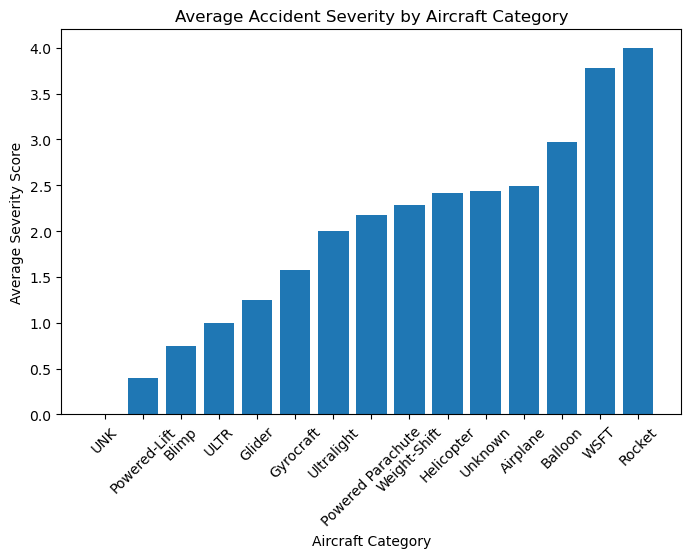

In [24]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the bar chart
ax.bar(category_risk.index, category_risk.values)

# Set labels and title
ax.set_xlabel("Aircraft Category")
ax.set_ylabel("Average Severity Score")
ax.set_title("Average Accident Severity by Aircraft Category")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

#### Findings
The results show that certain aircraft categories consistently experience lower average severity scores.
Aircraft such as powered-lift, blimp, and glider have the lowest average severity scores,
while categories like balloon, WSFT, and rocket show higher severity, indicating higher risk.


### Engine Type Risk


The data was grouped by engine type, calculate the average accident
severity score for each category, and sorts the results from lowest to highest risk.

In [25]:
# Calculate the average severity score for each Engine Type
engine_risk = (
    df1.groupby('Engine.Type')['severity_score']
    .mean().sort_values()
)

engine_risk

Engine.Type
Geared Turbofan     0.000000
NONE                0.000000
Electric            0.800000
Reciprocating       1.656393
UNK                 2.000000
Turbo Shaft         2.516487
Turbo Prop          2.937187
Hybrid Rocket       4.000000
Turbo Jet           4.869132
Unknown             5.881671
Turbo Fan           8.367997
LR                 22.500000
Name: severity_score, dtype: float64

This visualization compares average accident severity by different Engine types.

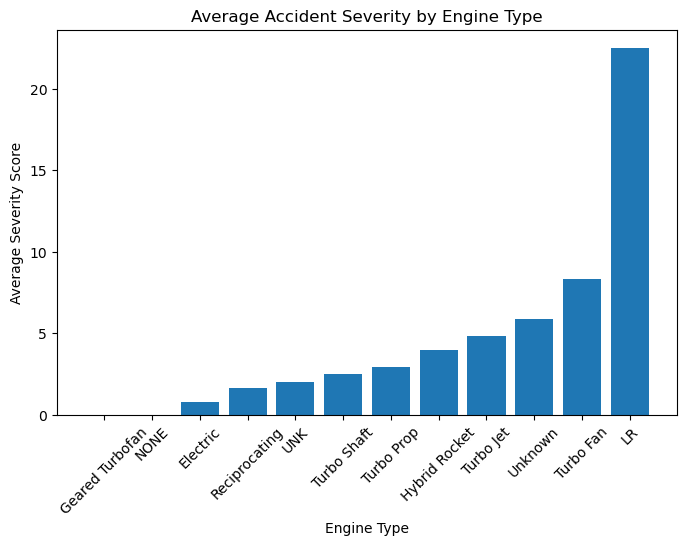

In [26]:

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8,5))

# Plot the bar chart
ax.bar(engine_risk.index, engine_risk.values)

# Set labels and title
ax.set_xlabel("Engine Type")
ax.set_ylabel("Average Severity Score")
ax.set_title("Average Accident Severity by Engine Type")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



#### Findings

The results indicates that aircraft with electric and reciprocating engines have the
lowest average accident severity, while turbo fan and LR engine types show substantially
higher severity. To minimize safety and financial risk, the company should prioritize
aircraft with lower-severity engine types and avoid high-severity engine configurations


### Weather Conditon

The data was grouped by weather condition, calculate the average accident severity score for each category and visualize it across different engine types.

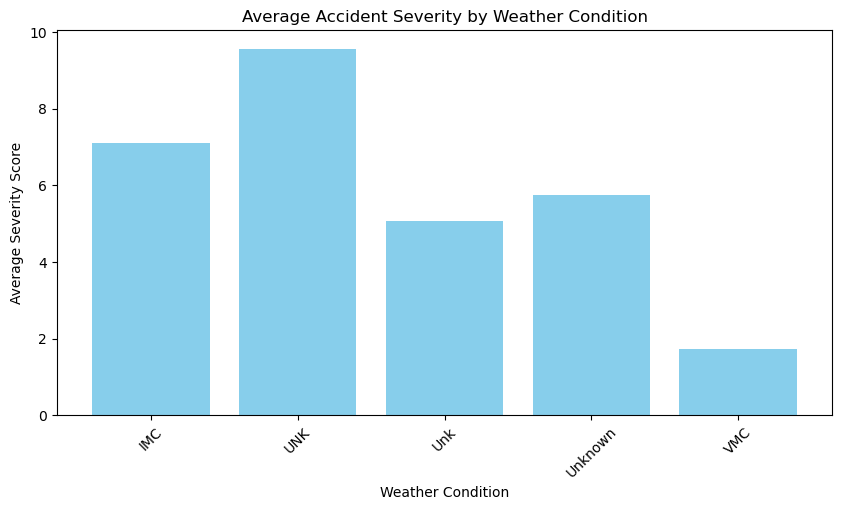

In [27]:
# Calculate average severity by weather condition
weather_risk = df1.groupby('Weather.Condition')['severity_score'].mean()

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10,5))  

# Plot the bar chart
ax.bar(weather_risk.index, weather_risk.values, color='skyblue') 

# Set labels and title
ax.set_xlabel("Weather Condition")
ax.set_ylabel("Average Severity Score")
ax.set_title("Average Accident Severity by Weather Condition")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


#### Findings
This shows that accidents occurring under unknown or unclear weather conditions (UNK, IMC) 
have higher average severity scores, with UNK being the highest. In contrast, accidents 
in clear weather conditions (VMC) have the lowest average severity, 
indicating that poor or uncertain weather contributes to more severe accidents.

## Flight Phase
The data was grouped by flight phase, calculate the average accident
severity score for each category, sorts the results from lowest to highest risk and visualize it by different flight phases.

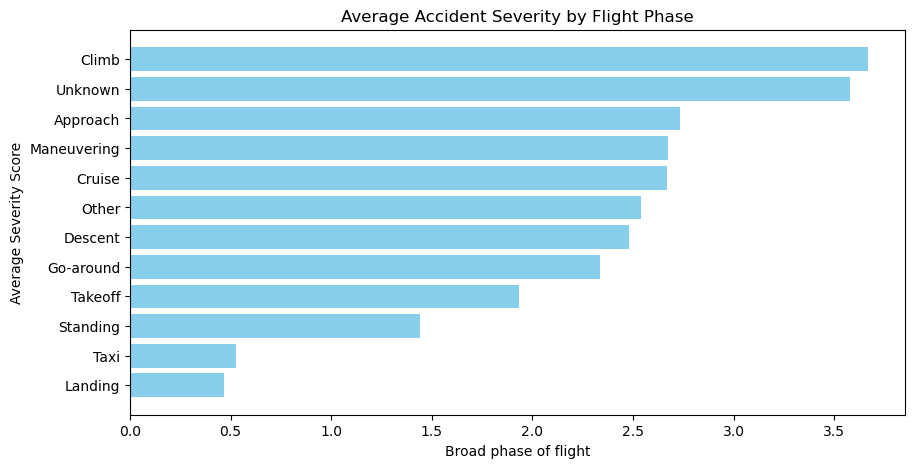

In [28]:
# Calculate average severity by Flight phase
phase_risk = df1.groupby('Broad.phase.of.flight')['severity_score'].mean().sort_values()

# Calculate average severity by weather condition

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10,5))  

# Plot the bar chart
ax.barh(phase_risk.index, phase_risk.values, color='skyblue') 

# Set labels and title
ax.set_xlabel("Broad phase of flight")
ax.set_ylabel("Average Severity Score")
ax.set_title("Average Accident Severity by Flight Phase")

# Display the plot
plt.show()


### Findings 
The chart reveals that Climb is the most dangerous 
phase of flight in terms of accident severity, followed closely by Approach and 
Maneuvering. 
In contrast, ground-based activities like Taxiing and Landing exhibit the lowest severity scores, suggesting
that while incidents may occur, they are far less likely to result in catastrophic outcomes. 

## Aircraft Manufacturer


This code combines rare vehicle makes (fewer than 50 accidents) into an "Other" category, 
then calculates and sorts the average accident severity for each make. The top 10 lowest-risk manufacturers are displayed.



In [29]:
# Combine rare makes into 'Other'
make_counts = df1['Make'].value_counts()
rare_makes = make_counts[make_counts < 50].index 
df1['Make_Clean'] = df1['Make'].replace(rare_makes, 'Other')

# Calculate average severity score by Make_Clean
make_risk = df1.groupby('Make_Clean')['severity_score'].mean().sort_values()
make_risk.head(10)  


C:\Users\hp\AppData\Local\Temp\ipykernel_2260\2348751912.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Make_Clean'] = df1['Make'].replace(rare_makes, 'Other')


Make_Clean
Unknown                           0.191834
Grumman-schweizer                 0.545455
GRUMMAN ACFT ENG COR-SCHWEIZER    0.551724
AVIAT AIRCRAFT INC                0.666667
Weatherly                         0.689655
Air Tractor                       0.796639
Hiller                            0.816720
Rotorway                          0.821429
Waco                              0.838983
Aviat                             0.892857
Name: severity_score, dtype: float64

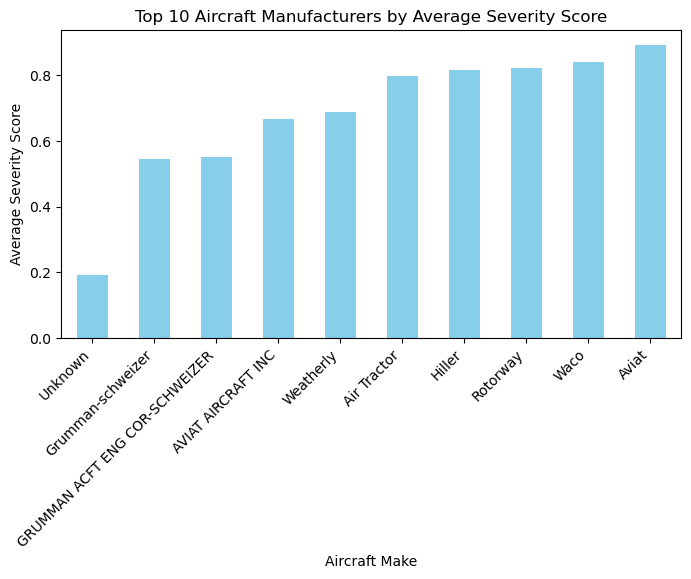

In [30]:
# Visualize average accident severity by Aircraft manufacturer.
plt.figure(figsize=(8,4))
make_risk.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Aircraft Manufacturers by Average Severity Score")
plt.ylabel("Average Severity Score")
plt.xlabel("Aircraft Make")
plt.xticks(rotation=45, ha='right')
plt.show()


#### Findings

The results indicate that aircraft manufactured by Grumman-Schweizer, and AVIA Aircraft Inc. 
have the lowest average accident severity, while Aviat, Waco, and Rotornay show higher severity among the top 10. 
To minimize safety and financial risk, stakeholders should prioritize aircraft from manufacturers with lower-severity 
averages and exercise caution with those associated with higher severity scores.


## Conclusion


This analysis used aviation accident data from 1962 to 2023 to understand what affects accident severity. The data was cleaned and visualized to support safer aircraft decisions.

The weather chart shows that accidents in poor weather had higher severity, while clear weather had lower severity. 
The engine type chart shows that some engine types had lower average severity for example, electric and reciprocating engines have the lowest average accident severity, while turbo fan and LR engine types show higher severity. 
The aircraft make chart shows that some manufacturers had lower accident severity than others. For example, makes such as Cessna and Piper appeared on the lower end of the severity scale in the chart, indicating lower risk compared to other makes.
The flight phase chart shows that some stages of operation result in significantly higher accident severity than others. For example, phases such as Climb and Approach appear on the higher end of the severity scale in the chart, indicating a greater risk of catastrophic outcomes compared to ground-based phases like Taxi and Landing, which sit at the lowest end of the scale.

Based on these results, the company should focus on operating in safer weather, choosing safer engine types, and purchasing aircraft makes with lower historical accident severity. Additionally, these findings suggest that flight crews should prioritize enhanced training and safety protocols for high-risk flight phases such as Climb and Approach, which show the highest levels of severity.These findings support safer, data-driven decisions as the company enters the aviation industry.